<a href="https://colab.research.google.com/github/omardrho/IBM_Analyzing-Historical-Stock-Revenue-Data./blob/main/spam_emails_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px

In [25]:
data_path="/content/spam.csv"
df=pd.read_csv(data_path, encoding='latin-1')


Discovering

In [26]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [27]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [28]:
df = df.rename(columns={'v1': 'type'})

In [29]:
df = df.rename(columns={'v2': 'message'})

In [30]:
df

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [31]:
df.isna().sum()  #no null values

type       0
message    0
dtype: int64

In [32]:
df.describe()

,type,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   type     5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<Axes: xlabel='type', ylabel='count'>

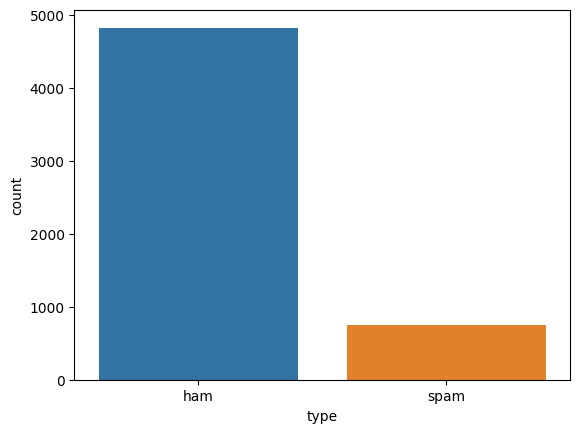

In [34]:
sns.countplot(x='type', data=df)

Preprocessing

1- vectorization 

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['type'])

df['encoded_type'] = le.transform(df['type'])
df.head()

,type,message,encoded_type
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


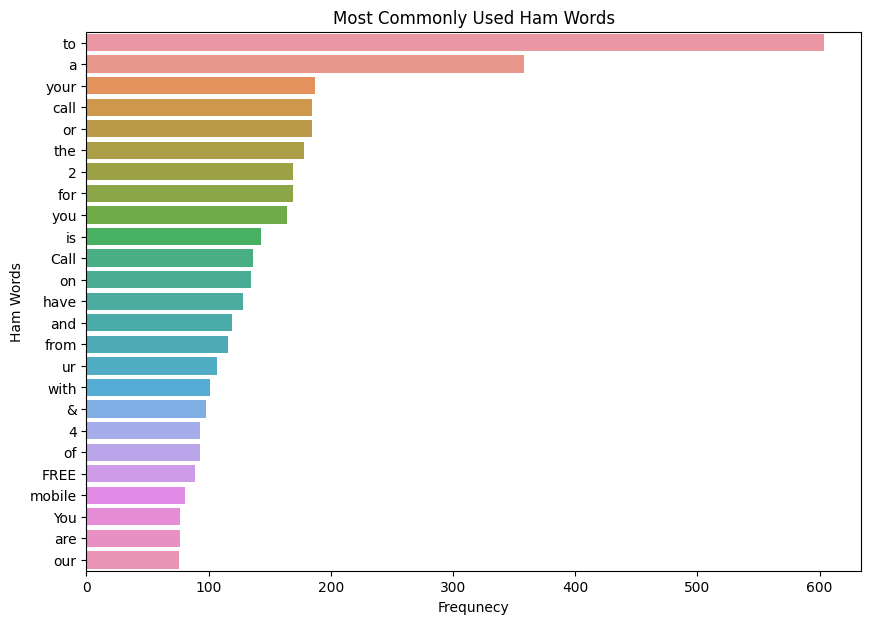

In [39]:
spam_corpus = []
for msg in df[df['encoded_type'] == 1]['message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
from collections import Counter
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(spam_corpus).most_common(25))[0],x=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used Ham Words")
plt.xlabel("Frequnecy")
plt.ylabel("Ham Words")
plt.show()


In [63]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['encoded_type'], test_size=0.2, random_state=42)

In [64]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

Modeling


In [65]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [66]:
models = [
    MultinomialNB(),
    LogisticRegression(),
    SVC(kernel='linear'),
    RandomForestClassifier(n_estimators=100)
]

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [69]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    print(model.__class__.__name__)
    print('Accuracy:', accuracy)
    print('Confusion matrix:\n', confusion)
    print('-' * 50)

MultinomialNB
Accuracy: 0.9838565022421525
Confusion matrix:
 [[963   2]
 [ 16 134]]
--------------------------------------------------
LogisticRegression
Accuracy: 0.97847533632287
Confusion matrix:
 [[965   0]
 [ 24 126]]
--------------------------------------------------
SVC
Accuracy: 0.979372197309417
Confusion matrix:
 [[961   4]
 [ 19 131]]
--------------------------------------------------
RandomForestClassifier
Accuracy: 0.9748878923766816
Confusion matrix:
 [[965   0]
 [ 28 122]]
--------------------------------------------------
